In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('C:/Users/sweta/Downloads/archive (1)/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
# Helper function to add percentage labels
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black')

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\203579668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AgeGroup', y='Exited', data=df,


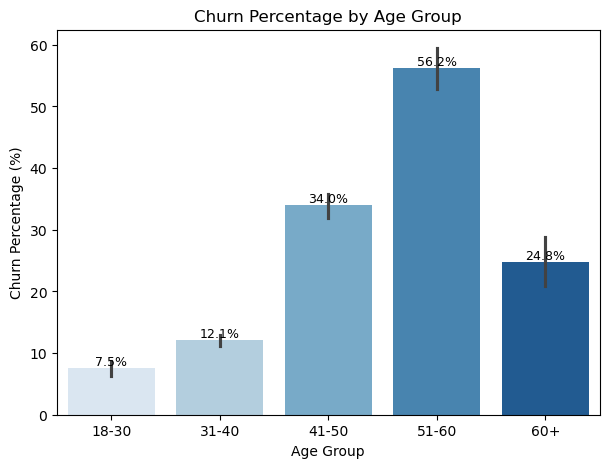

In [7]:
# --- Churn by Age Group ---
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100], 
                        labels=['18-30','31-40','41-50','51-60','60+'])

plt.figure(figsize=(7,5))
age_colors = sns.color_palette("Blues", n_colors=df['AgeGroup'].nunique())
ax = sns.barplot(x='AgeGroup', y='Exited', data=df, 
                 estimator=lambda x: 100*sum(x)/len(x),
                 palette=age_colors)
add_labels(ax)
plt.title("Churn Percentage by Age Group")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Age Group")
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\2778000664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Geography', y='Exited', data=df,


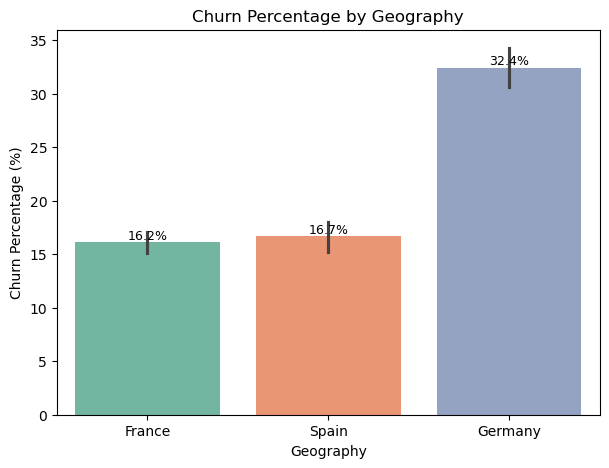

In [8]:
# --- Churn by Geography ---
plt.figure(figsize=(7,5))
geo_colors = sns.color_palette("Set2", n_colors=df['Geography'].nunique())
ax = sns.barplot(x='Geography', y='Exited', data=df, 
                 estimator=lambda x: 100*sum(x)/len(x),
                 palette=geo_colors)
add_labels(ax)
plt.title("Churn Percentage by Geography")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Geography")
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\2210289003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tenure', y='Exited', data=df,


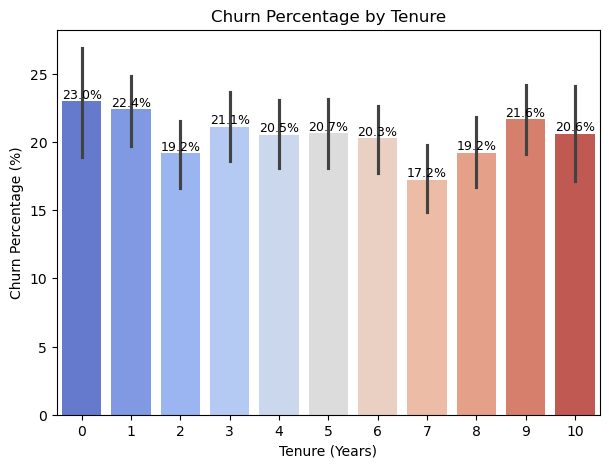

In [9]:
# --- Churn by Tenure ---
plt.figure(figsize=(7,5))
tenure_colors = sns.color_palette("coolwarm", n_colors=df['Tenure'].nunique())
ax = sns.barplot(x='Tenure', y='Exited', data=df, 
                 estimator=lambda x: 100*sum(x)/len(x),
                 palette=tenure_colors)
add_labels(ax)
plt.title("Churn Percentage by Tenure")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Tenure (Years)")
plt.show()

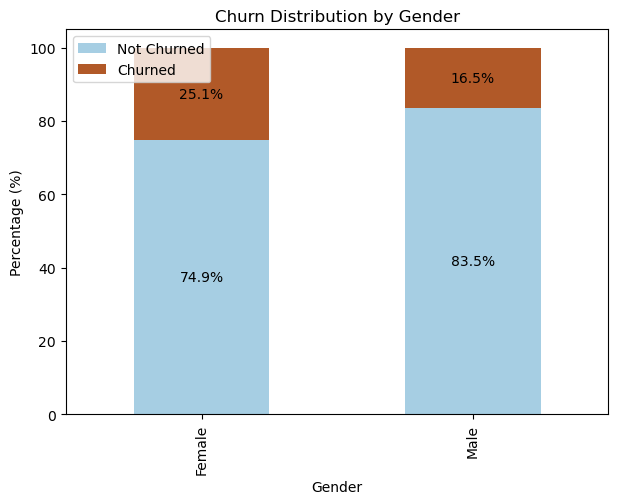

In [10]:
# --- Stacked Bar: Gender vs Churn ---
gender_churn_ct = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
ax = gender_churn_ct.plot(kind='bar', stacked=True, figsize=(7,5), colormap="Paired")
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")
plt.title("Churn Distribution by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.legend(["Not Churned","Churned"])
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\71484953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df, palette="muted")


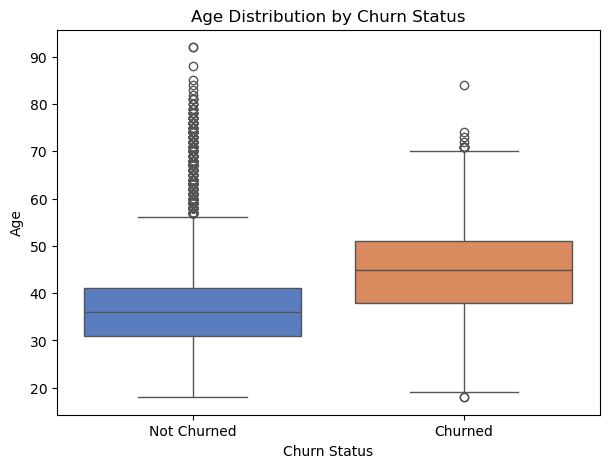

In [11]:
# --- Boxplot: Age vs Churn ---
plt.figure(figsize=(7,5))
sns.boxplot(x='Exited', y='Age', data=df, palette="muted")
plt.title("Age Distribution by Churn Status")
plt.xticks([0,1], ['Not Churned','Churned'])
plt.xlabel("Churn Status")
plt.ylabel("Age")
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\1237266197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=df, palette="muted")


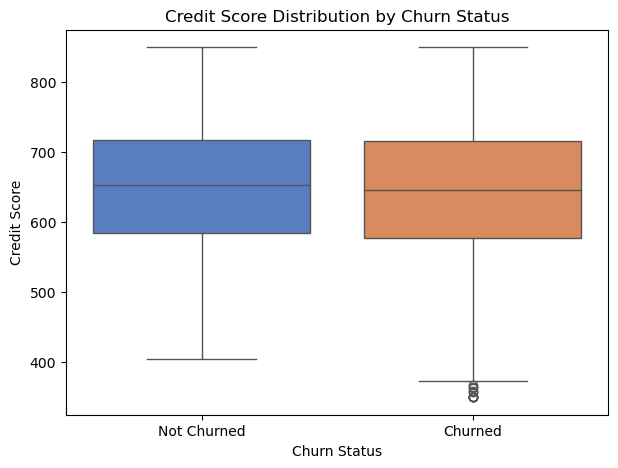

In [12]:
# --- Boxplot: Credit Score vs Churn ---
plt.figure(figsize=(7,5))
sns.boxplot(x='Exited', y='CreditScore', data=df, palette="muted")
plt.title("Credit Score Distribution by Churn Status")
plt.xticks([0,1], ['Not Churned','Churned'])
plt.xlabel("Churn Status")
plt.ylabel("Credit Score")
plt.show()

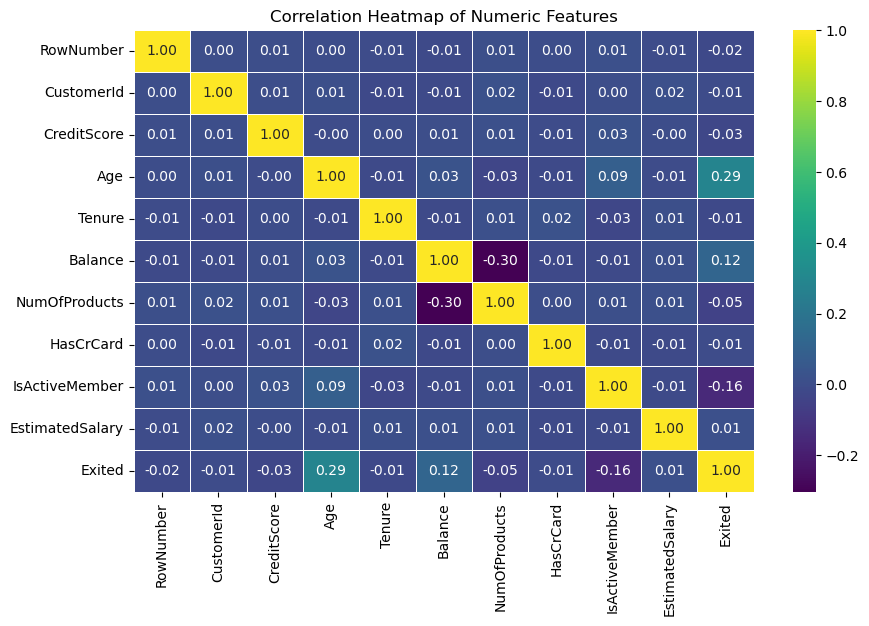

In [13]:
# --- Correlation Heatmap ---
# --- Correlation Heatmap (numeric only) ---
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64','float64'])  # keep only numeric
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [14]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,41-50,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,41-50,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,41-50,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,31-40,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,41-50,False,True


In [16]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
            'Geography_Germany', 'Geography_Spain']

X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [19]:
# --- Train Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# --- Predictions ---
y_pred = rf_model.predict(X_test)

In [21]:
# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8665

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



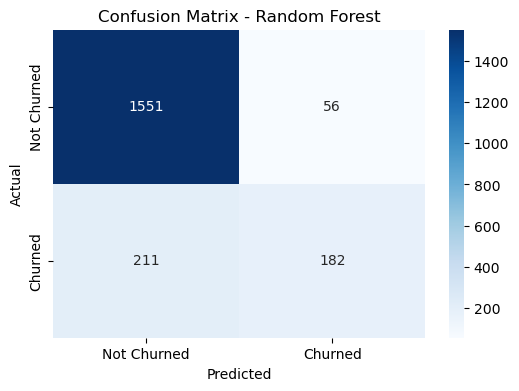

In [22]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned','Churned'],
            yticklabels=['Not Churned','Churned'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\59429288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


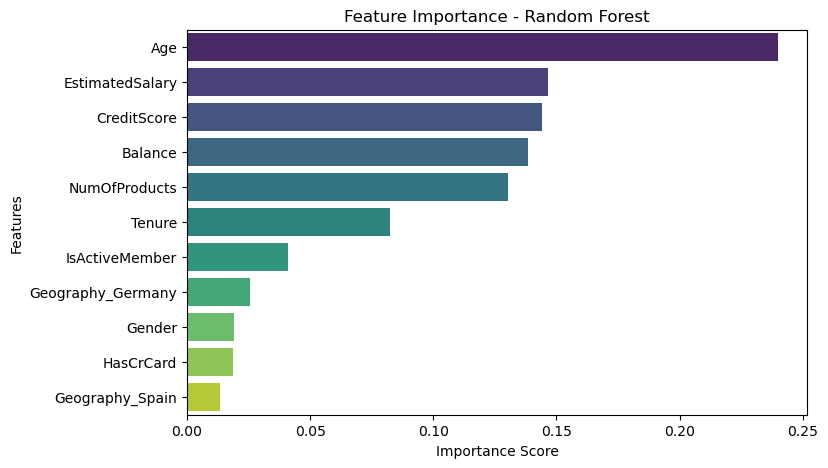

In [23]:
# --- Feature Importance ---
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Logistic Regression Results
Accuracy: 0.811

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



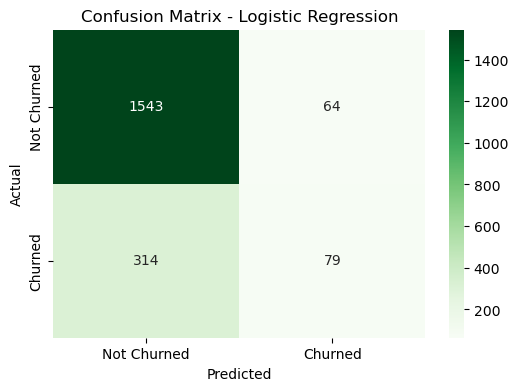

In [24]:
from sklearn.linear_model import LogisticRegression

# --- Train Logistic Regression ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_log = log_model.predict(X_test)

# --- Evaluation ---
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# --- Confusion Matrix ---
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Not Churned','Churned'],
            yticklabels=['Not Churned','Churned'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Support Vector Machine Results
Accuracy: 0.856

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



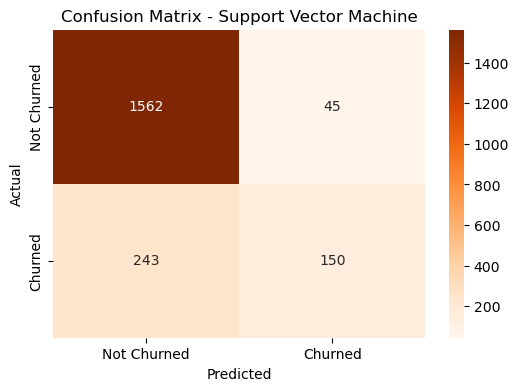

In [25]:
from sklearn.svm import SVC

# --- Train Support Vector Machine (SVM) ---
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' works well for non-linear data
svm_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_svm = svm_model.predict(X_test)

# --- Evaluation ---
print("Support Vector Machine Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# --- Confusion Matrix ---
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Not Churned','Churned'],
            yticklabels=['Not Churned','Churned'])
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-Nearest Neighbors Results
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



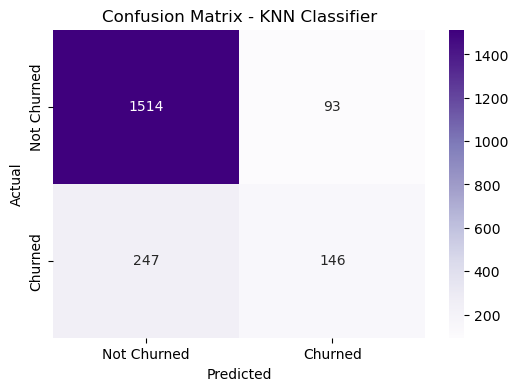

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# --- Train KNN Classifier ---
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_knn = knn_model.predict(X_test)

# --- Evaluation ---
print("K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# --- Confusion Matrix ---
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Not Churned','Churned'],
            yticklabels=['Not Churned','Churned'])
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gradient Boosting Results
Accuracy: 0.8675

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



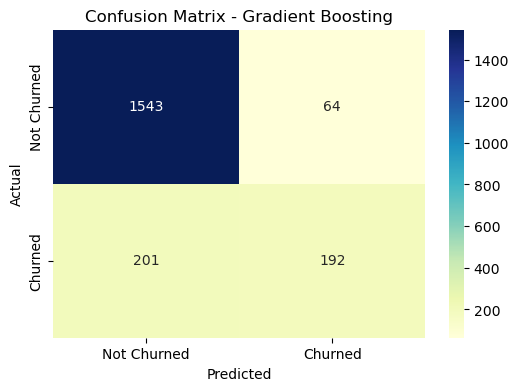

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# --- Train Gradient Boosting Classifier ---
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                      max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_gb = gb_model.predict(X_test)

# --- Evaluation ---
print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# --- Confusion Matrix ---
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['Not Churned','Churned'],
            yticklabels=['Not Churned','Churned'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\sweta\AppData\Local\Temp\ipykernel_45196\2207805359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb_feature_importances.values, y=gb_feature_importances.index, palette="cividis")


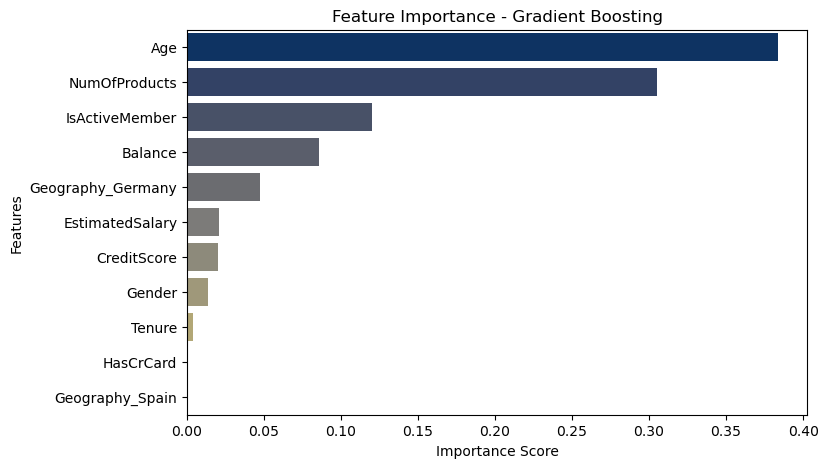

In [28]:
# --- Feature Importance ---
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=gb_feature_importances.values, y=gb_feature_importances.index, palette="cividis")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [29]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/sweta/Downloads/archive (1)/Churn_Modelling.csv")

# --- Quick check ---
print(df.head())
print(df.info())

# --- Feature Engineering ---

# Binary feature for Balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], 
                        labels=['18-25', '26-35', '36-45', '46-55', 
                                '56-65', '66-75', '76-85', '86-95'])

# Balance to Salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Interaction feature: NumOfProducts × IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

# Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], 
                           bins=[0, 2, 5, 7, 10], 
                           labels=['0-2', '3-5', '6-7', '8-10'])


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [30]:
# Show updated dataset
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  BalanceZero AgeGroup  BalanceToSalaryRatio  \
0        101348.88       1            1    36-45              0.000000   
1        1

In [31]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

df = pd.get_dummies(df, columns=['AgeGroup', 'TenureGroup'], drop_first=True)

In [32]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Geography_Germany', 'Geography_Spain', 
            'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage',
            'Male_Germany', 'Male_Spain'] + \
           [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

X = df[features]
y = df['Exited']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(accuracy)

[[1547   60]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

0.865


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define model
gb = GradientBoostingClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Setup GridSearchCV
gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid, 
                       scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fit model
gb_grid.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters for GB:", gb_grid.best_params_)
print("Best F1 Score for GB:", gb_grid.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for GB: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score for GB: 0.5995118119703644


In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define model
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define parameter space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Setup RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                scoring='f1', cv=5, n_iter=30,
                                n_jobs=-1, verbose=2, random_state=42)

# Fit model
xgb_random.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters for XGB:", xgb_random.best_params_)
print("Best F1 Score for XGB:", xgb_random.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for XGB: {'subsample': 0.8, 'reg_lambda': 2, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best F1 Score for XGB: 0.5996506816313099


C:\Users\sweta\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Gradient Boosting Best Model
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)
print("Gradient Boosting Test Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# XGBoost Best Model
best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Test Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Gradient Boosting Test Results:
Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

XGBoost Test Results:
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.72      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [38]:
class_weight = 'balanced'

In [39]:
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Create SMOTE + Model pipeline
smote = SMOTE(random_state=42)

gb = GradientBoostingClassifier(random_state=42)

# Pipeline: first apply SMOTE, then train GB
pipeline = Pipeline([
    ('smote', smote),
    ('gb', gb)
])

# GridSearchCV with pipeline
gb_grid = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'gb__n_estimators': [100, 200],
        'gb__learning_rate': [0.05, 0.1],
        'gb__max_depth': [3, 5],
    },
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

gb_grid.fit(X_train, y_train)
print("Best Params (GB + SMOTE):", gb_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params (GB + SMOTE): {'gb__learning_rate': 0.05, 'gb__max_depth': 5, 'gb__n_estimators': 200}


In [41]:
# Calculate imbalance ratio
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

param_dist = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=20,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

xgb_random.fit(X_train, y_train)
print("Best Params (XGB + Imbalance):", xgb_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\sweta\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:58:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params (XGB + Imbalance): {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [83]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

y_pred = xgb_random.best_estimator_.predict(X_test)
y_proba = xgb_random.best_estimator_.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

[[1329  278]
 [  96  297]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1607
           1       0.52      0.76      0.61       393

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.75      2000
weighted avg       0.85      0.81      0.82      2000

ROC-AUC: 0.8632604492748805
PR-AUC: 0.6803436769933374


In [87]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 6.2 MB/s eta 0:00:00


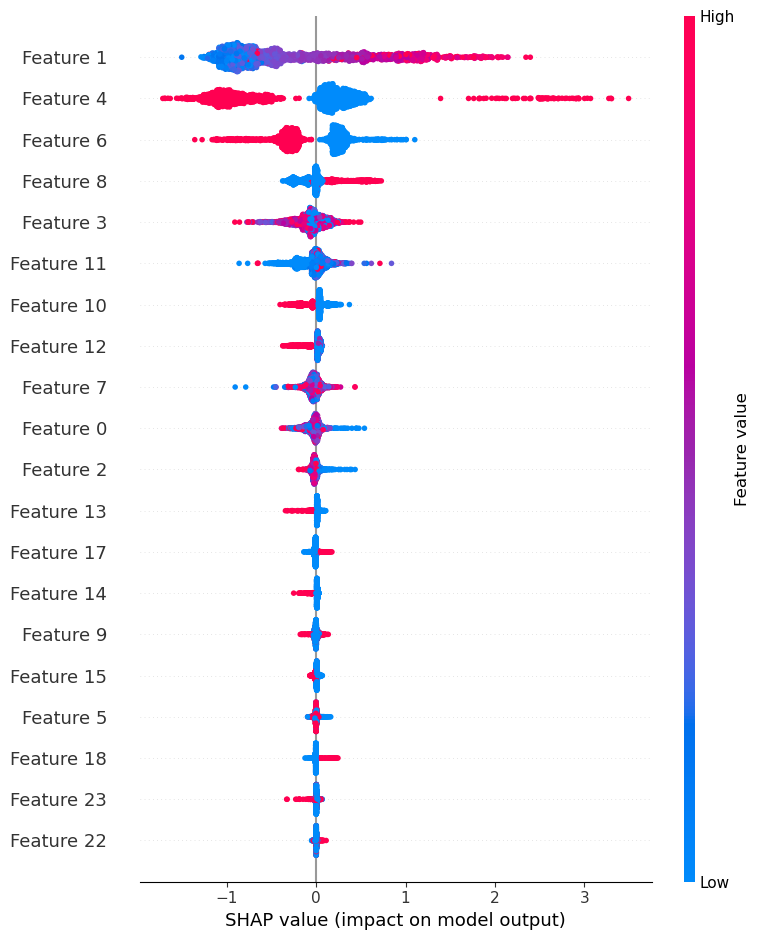

In [91]:
import shap

# Create explainer
explainer = shap.TreeExplainer(xgb_random.best_estimator_)

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test)

# Summary plot (feature importance + distribution of impact)
shap.summary_plot(shap_values, X_test)


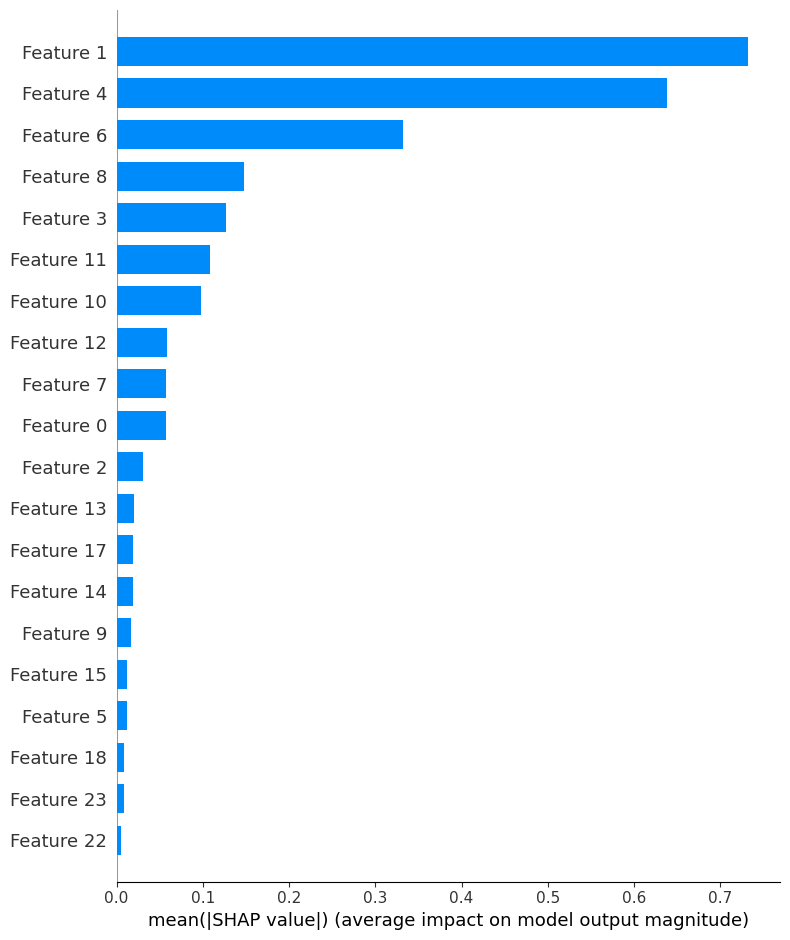

In [93]:
# bar plot for average importance
shap.summary_plot(shap_values, X_test, plot_type="bar")